# Applying the Model

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
img_md_subset = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_merged.csv')
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [3]:
img_md_subset

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,merged_category,geometry
0,D20180221T193119_IFCB116_01153,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119,chlorophytes,POINT (-64.1339 -64.7535)
1,D20180221T202431_IFCB116_00153,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,gymnodinium,POINT (-64.16549999999999 -64.7741)
2,D20180221T202431_IFCB116_01303,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,gymnodinium,POINT (-64.16549999999999 -64.7741)
3,D20180221T202431_IFCB116_03008,validated,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,katodinium,POINT (-64.16549999999999 -64.7741)
4,D20180221T212254_IFCB116_07034,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254,chlorophytes,POINT (-63.9785 -64.78019999999999)
5,D20180221T212254_IFCB116_00497,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7802,-63.9785,20180221,212254,gymnodinium,POINT (-63.9785 -64.78019999999999)
6,D20180221T212254_IFCB116_03025,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7802,-63.9785,20180221,212254,gymnodinium,POINT (-63.9785 -64.78019999999999)
7,D20180221T212254_IFCB116_05940,validated,Dinophyceae,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7802,-63.9785,20180221,212254,dinophyceae,POINT (-63.9785 -64.78019999999999)
8,D20180221T212254_IFCB116_09193,validated,Dinophyceae,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7802,-63.9785,20180221,212254,dinophyceae,POINT (-63.9785 -64.78019999999999)
9,D20180221T212254_IFCB116_04051,validated,Dinophyceae,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7802,-63.9785,20180221,212254,dinophyceae,POINT (-63.9785 -64.78019999999999)


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [5]:
import glob, os

file_dir = '../../../Data/all_imagery/'

os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[:-4] for x in fn_list]

available_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(available_subset)

5158010


1328483

In [6]:
class_id_dict = {'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 2 temp': 39,
 'centric 3 temp': 40,
 'centric 4 temp': 41,
 'centric 6 temp': 42,
 'chain<centric': 43,
 'chain<pennate': 44,
 'detritus': 45,
 'dinoflagellate-i': 46,
 'dinoflagellate-ii': 47,
 'dinoflagellate-iii': 48,
 'multiple<other': 49,
 'part<other': 50,
 'pennate 10 temp': 51,
 'pennate 11 temp': 52,
 'pennate 2 temp': 53,
 'pennate 7 temp': 54,
 'pennate<Bacillariophyta': 55,
 't002': 56,
 't003': 57,
 't005': 58,
 't006': 59,
 't007': 60,
 't008': 61,
 't009': 62,
 't010': 63,
 't011': 64,
 't012': 65,
 't013': 66,
 't016': 67,
 't017': 68,
 't019': 69,
 'temp cylindrotheca': 70}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [7]:
frac = 0.05
int(len(available_subset) * frac)

66424

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []

for index, row in available_subset.sample(frac=frac).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    #labels.append(class_id_dict[row['object_annotation_category']])
    merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    
images = np.array(images)
labels = np.array(labels)
merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)

In [9]:
X_predict = images / 130
np.mean(X_predict), np.std(X_predict)

(0.97992396, 0.3252623)

In [10]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes.hdf5')

In [11]:
X_predict.shape

(66424, 150, 150, 1)

In [ ]:
def generate_data(directory, batch_size):
    """Replaces Keras' native ImageDataGenerator."""
    i = 0
    while True:
        
        images = []
        labels = []
        merged_labels = []
        original_labels = []

        for index, row in available_subset.sample(frac=frac).iterrows():

            # TODO need to think about optimal size and that size actually corresponds to class
            # maybe add blackspace instead of interpolating because it is changing the morphology

            img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
            images.append(image.img_to_array(img))
            labels.append(class_id_dict[row['merged_category']])
            merged_labels.append(row['merged_category'])
            original_labels.append(row['object_annotation_category'])
        
        
        
        image_batch = []
        for b in range(batch_size):
            if i == len(file_list):
                i = 0
                random.shuffle(file_list)
            sample = file_list[i]
            i += 1
            image = cv2.resize(cv2.imread(sample[0]), INPUT_SHAPE)
            image_batch.append((image.astype(float) - 128) / 128)

        yield np.array(image_batch)

In [12]:
predictions = np.argmax(model.predict(X_predict), axis=1)

In [ ]:
model.predict_generator(generator = tile_gen.tile_generator(clean_px, batch_size=100, flatten=True, canopy=True), steps=len(clean_px) // 100, verbose=1)

In [13]:
classes, counts = np.unique(predictions, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70]),
 array([   90,  1594,     4,     5,    98,   145,   118,    52,  2658,
          154,    47,   153,   700,     3,     3,     6,   271,     5,
           70,    16,    11,    70,   674,     3,     9,    68,   202,
         3182,     6,   142,     6,    51,     2,  6741,  1286,   137,
           63,   134,   614,   274,    12,    93,     4,    81,  3769,
          132,   188,     4,   435,    67,   110,   138,  2937,    65,
          105, 11943,  2900,    19,    39,  1696,  6672,    35,  2702,
         5158,  4965,    91,   288,   435,   320,  1154]))

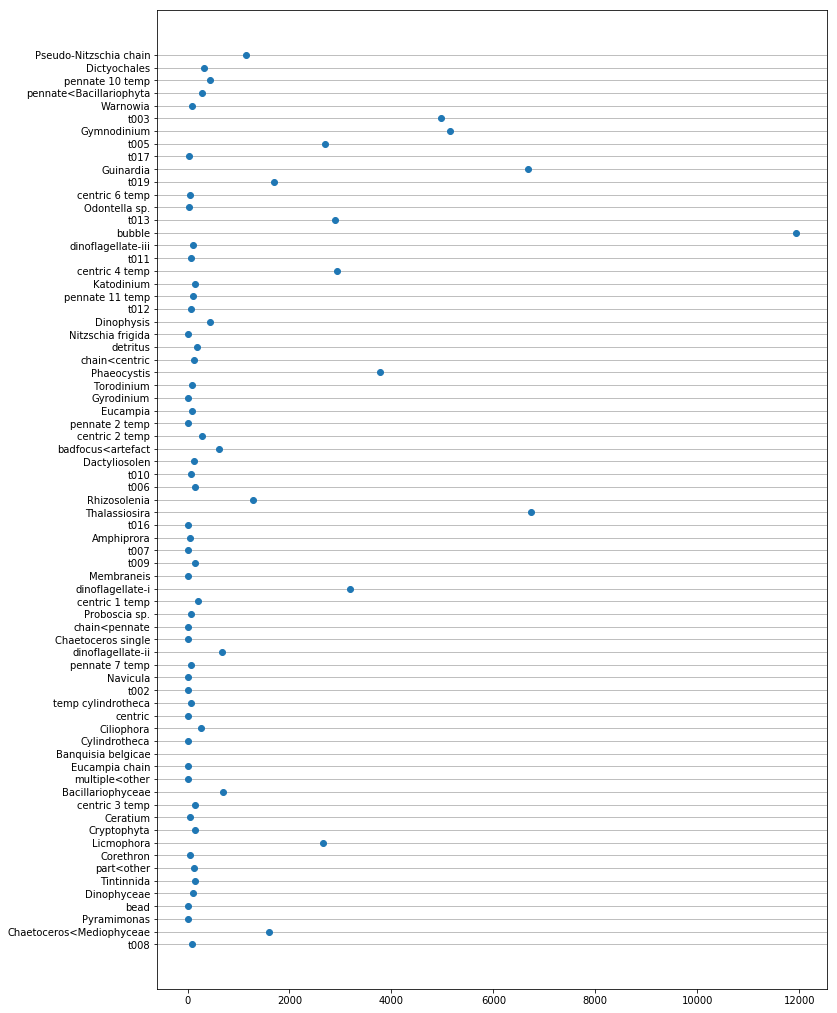

In [14]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(counts, classes)
ax.set_yticks(range(0,len(class_id_dict)))
ax.set_yticklabels(list(class_id_dict.keys()))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('output_predictions.png', dpi=300)
plt.show()

In [17]:
classes, counts = np.unique(labels, return_counts=True)
classes, counts

(array([], dtype=float64), array([], dtype=int64))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(counts, classes)
ax.set_yticks(range(0,len(class_id_dict)))
ax.set_yticklabels(list(class_id_dict.keys()))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# pull out only validated images and run it on them and see how close the total numbers compare